In [23]:
# Advertising Data

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

ad = pd.read_csv("data/Advertising.csv")
ad



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [18]:
# Columns of interest
sales = ad['sales'].values.reshape(-1,1)
tv = ad['TV'].values.reshape(-1,1)
radio=ad['radio'].values.reshape(-1,1)

X= np.column_stack((tv,radio))


In [5]:
# select linear regression model

model_tv=LinearRegression()
model_tv.fit(tv,sales)
tv_pred= model_tv.predict(tv)

model_radio=LinearRegression()
model_radio.fit(radio,sales)
radio_pred = model_radio.predict(radio)



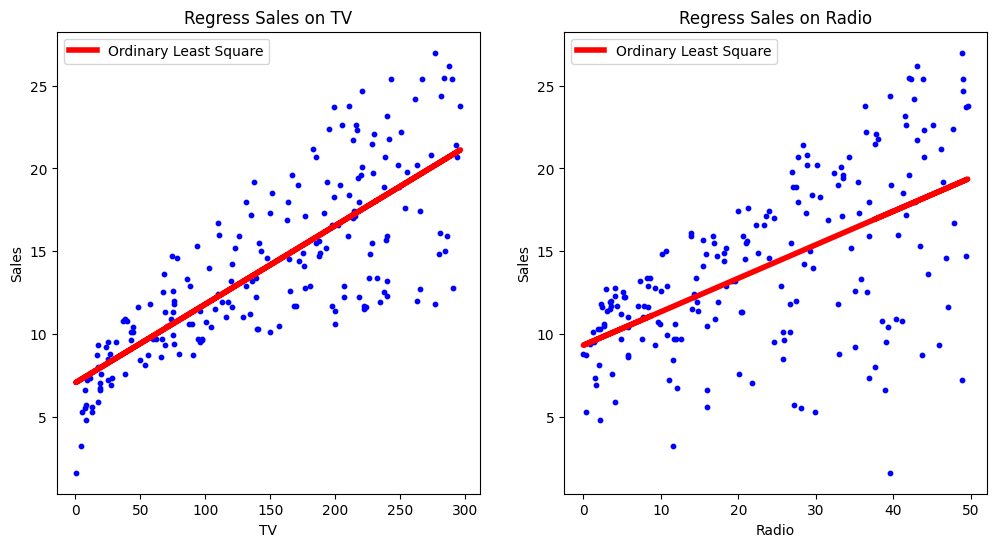

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(tv, sales, color='blue', s = 10)
plt.plot(tv, tv_pred, color='red', label='Ordinary Least Square', linewidth=4)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regress Sales on TV')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(radio, sales, color='blue', s = 10)
plt.plot(radio, radio_pred, color='red', label='Ordinary Least Square', linewidth=4)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Regress Sales on Radio')
plt.legend()

In [24]:
model_tv = sm.OLS(sales, tv)
results_tv = model_tv.fit()
print(results_tv.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                   3.52e-100
Time:                        16:13:33   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
model_radio = sm.OLS(sales, radio)
results_radio = model_radio.fit()
print(results_radio.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              834.0
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                    4.27e-73
Time:                        16:17:11   Log-Likelihood:                         -660.13
No. Observations:                 200   AIC:                                      1322.
Df Residuals:                     199   BIC:                                      1326.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:

model_mixed=LinearRegression()
model_mixed.fit(X,sales)

mixed_pred= model_mixed.predict(X)

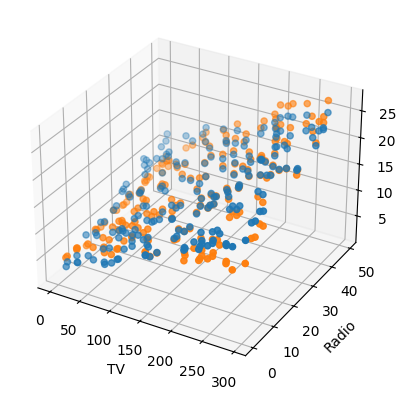

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x_range = np.linspace(0, 50, 100)
# y_range = np.linspace(0, 50, 100)
# x_grid, y_grid = np.meshgrid(x_range, y_range)
# z_grid = model_mixed.predict(np.column_stack((x_grid,y_grid)))



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], mixed_pred)
ax.scatter(X[:,0], X[:,1], sales)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

In [22]:
model_2d = sm.OLS(sales, X)
results_2d = model_2d.fit()

print(results_2d.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              5206.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                   6.73e-172
Time:                        16:08:14   Log-Likelihood:                         -426.71
No. Observations:                 200   AIC:                                      857.4
Df Residuals:                     198   BIC:                                      864.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
syn = tv * radio #synergy term

X_syn = np.column_stack((X,syn))

model_syn = sm.OLS(sales, X_syn)
results_syn = model_syn.fit()

print(results_syn.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3454.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                   5.25e-170
Time:                        16:08:02   Log-Likelihood:                         -426.66
No. Observations:                 200   AIC:                                      859.3
Df Residuals:                     197   BIC:                                      869.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------